# ロジスティク回帰

## ロジスティック回帰とは

- 活性化関数にシグモイド関数を使用した、2値分類問題。

- 学習フロー
  - 活性化関数にシグモイド関数
  - Errorを最小化するように重み更新


　　　　　<img src="fig/error.png" width="50%">

## シグモイド関数

　$f(X)$ を多変数関数として、シグモイド関数の定義は、
$$
\sigma (f(X)) = \frac{1}{1 + e^{-f(X)}}
$$

値が0.0〜1.0なので、この値を確率とみなすことができる。

- Pythonによるシグモイド関数

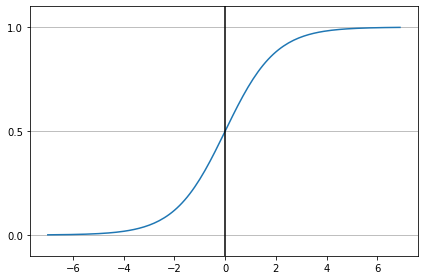

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


## ロジスティック回帰の実装

### アルゴリズム
- 総入力関数を
$$
f(x_1,x_2) = w_0 + w_1x_1 + w_2x_2
$$

として、このデータが正解である確率をシグモイド関数で求める。

$$
P(x_1,x_2)=\sigma(f(x_1,x_2))
$$

- n番目のデータを正しく予測する確率を Pnとする。  
全てのデータを正しく予測する確率Pは以下となりPの最大値を取るような重みを見つける。

$$
P=P_1P_2P_3...P_n
$$

- 計算しやすい様に対数をとった関数Eを最小化する重みを見つける。

$$
E=-\log P
$$

- 最終的には以下の誤差関数Eが得られる。

$$
E=\sum_{n=1}^{N} [t_n\log P(x_{1n},x_{2n})+(1-t_n)log\{1-P(x_{1n},x_{2n})\}]
$$

- 誤差関数Eの極小値を求めればよい。
- 偏微分方程式を「勾配降下法」を使い解を求める。

$$
\frac{\partial E}{\partial (w_0,w_1,w_2)}=0
$$

## Kerasによる実装

### データ準備　

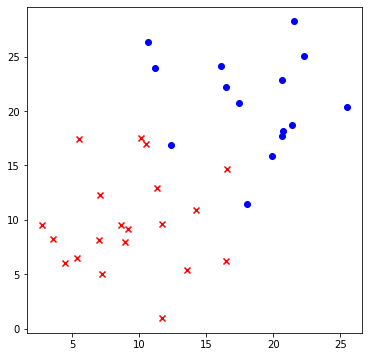

,x1,x2,t
30,16.450200,6.265440,0
31,8.942052,7.980884,0
32,25.464995,20.352601,1
33,10.633718,26.321456,1
34,3.547441,8.265382,0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data_set = pd.read_csv('https://www.lighthouselab.co.jp/p/anaconda/test_data1.csv',index_col=0)


%matplotlib inline
fig = plt.figure(figsize=(6,6))
data0 = data_set[data_set['t']==0]
data1 = data_set[data_set['t']==1]

plt.scatter(data0.x1, data0.x2, c='r', marker='x')
plt.scatter(data1.x1, data1.x2, c='b',marker='o')
plt.show()
data_set.tail()


### 計算モデルの定義

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(units = 1,
            input_shape=(2,), activation='sigmoid'))

model.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 計算実行

In [4]:
x_train = data_set[['x1','x2']].values
y_train = data_set[['t']].values

model.fit(x_train, y_train, epochs=10000,verbose=0)


### 計算された重みの表示

In [5]:
W = model.get_weights()
w1,w2,w0 = W[0][0][0],W[0][1][0],W[1][0]
print(w0,w1,w2)

-8.238762 0.2762059 0.26141867


### 結果の可視化

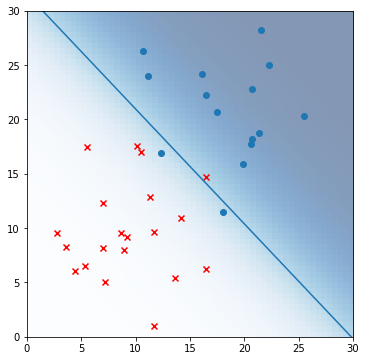

In [6]:
import numpy as np
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(data0.x1, data0.x2, marker='x',c='r')
subplot.scatter(data1.x1, data1.x2, marker='o')

linex = np.linspace(0,50,10)
#直線の計算
liney = - (w1*linex/w2 + w0/w2)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0 + w1*x1 + w2*x2))))
          for x1 in np.linspace(0,50,100)]
         for x2 in np.linspace(0,50,100)]

subplot.imshow(field, origin='lower', extent=(0,50,0,50),
               cmap=plt.cm.Blues, alpha=0.5)